In [2]:
!pip install mne
!pip install numpy
!pip install matplotlib
!pip install nilearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 23.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 35.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 1.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 25.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.5 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [3]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import ttest_ind, ttest_rel

## Cheatsheet
This markdown cell introduces a few python tricks that are useful for solving the tasks.

### Numpy functions
- `arr = np.array([1, 2, 3])` creates a numpy array.
- `arr.shape` returns the shape of the array.
- `arr.mean()` returns the mean of the array.
- `arr.mean(axis=x)` returns the mean of axis x.
- `arr.std()` returns the standard deviation of the array.
- `arr.std(axis=1)` returns the standard deviation of the second axis (remember that python is zero-indexed).



### Matplotlib

If you are not to familiar with plotting in python, you can look up the matplotlib [documentation](https://matplotlib.org/stable/). Here is a simple example to get you started:


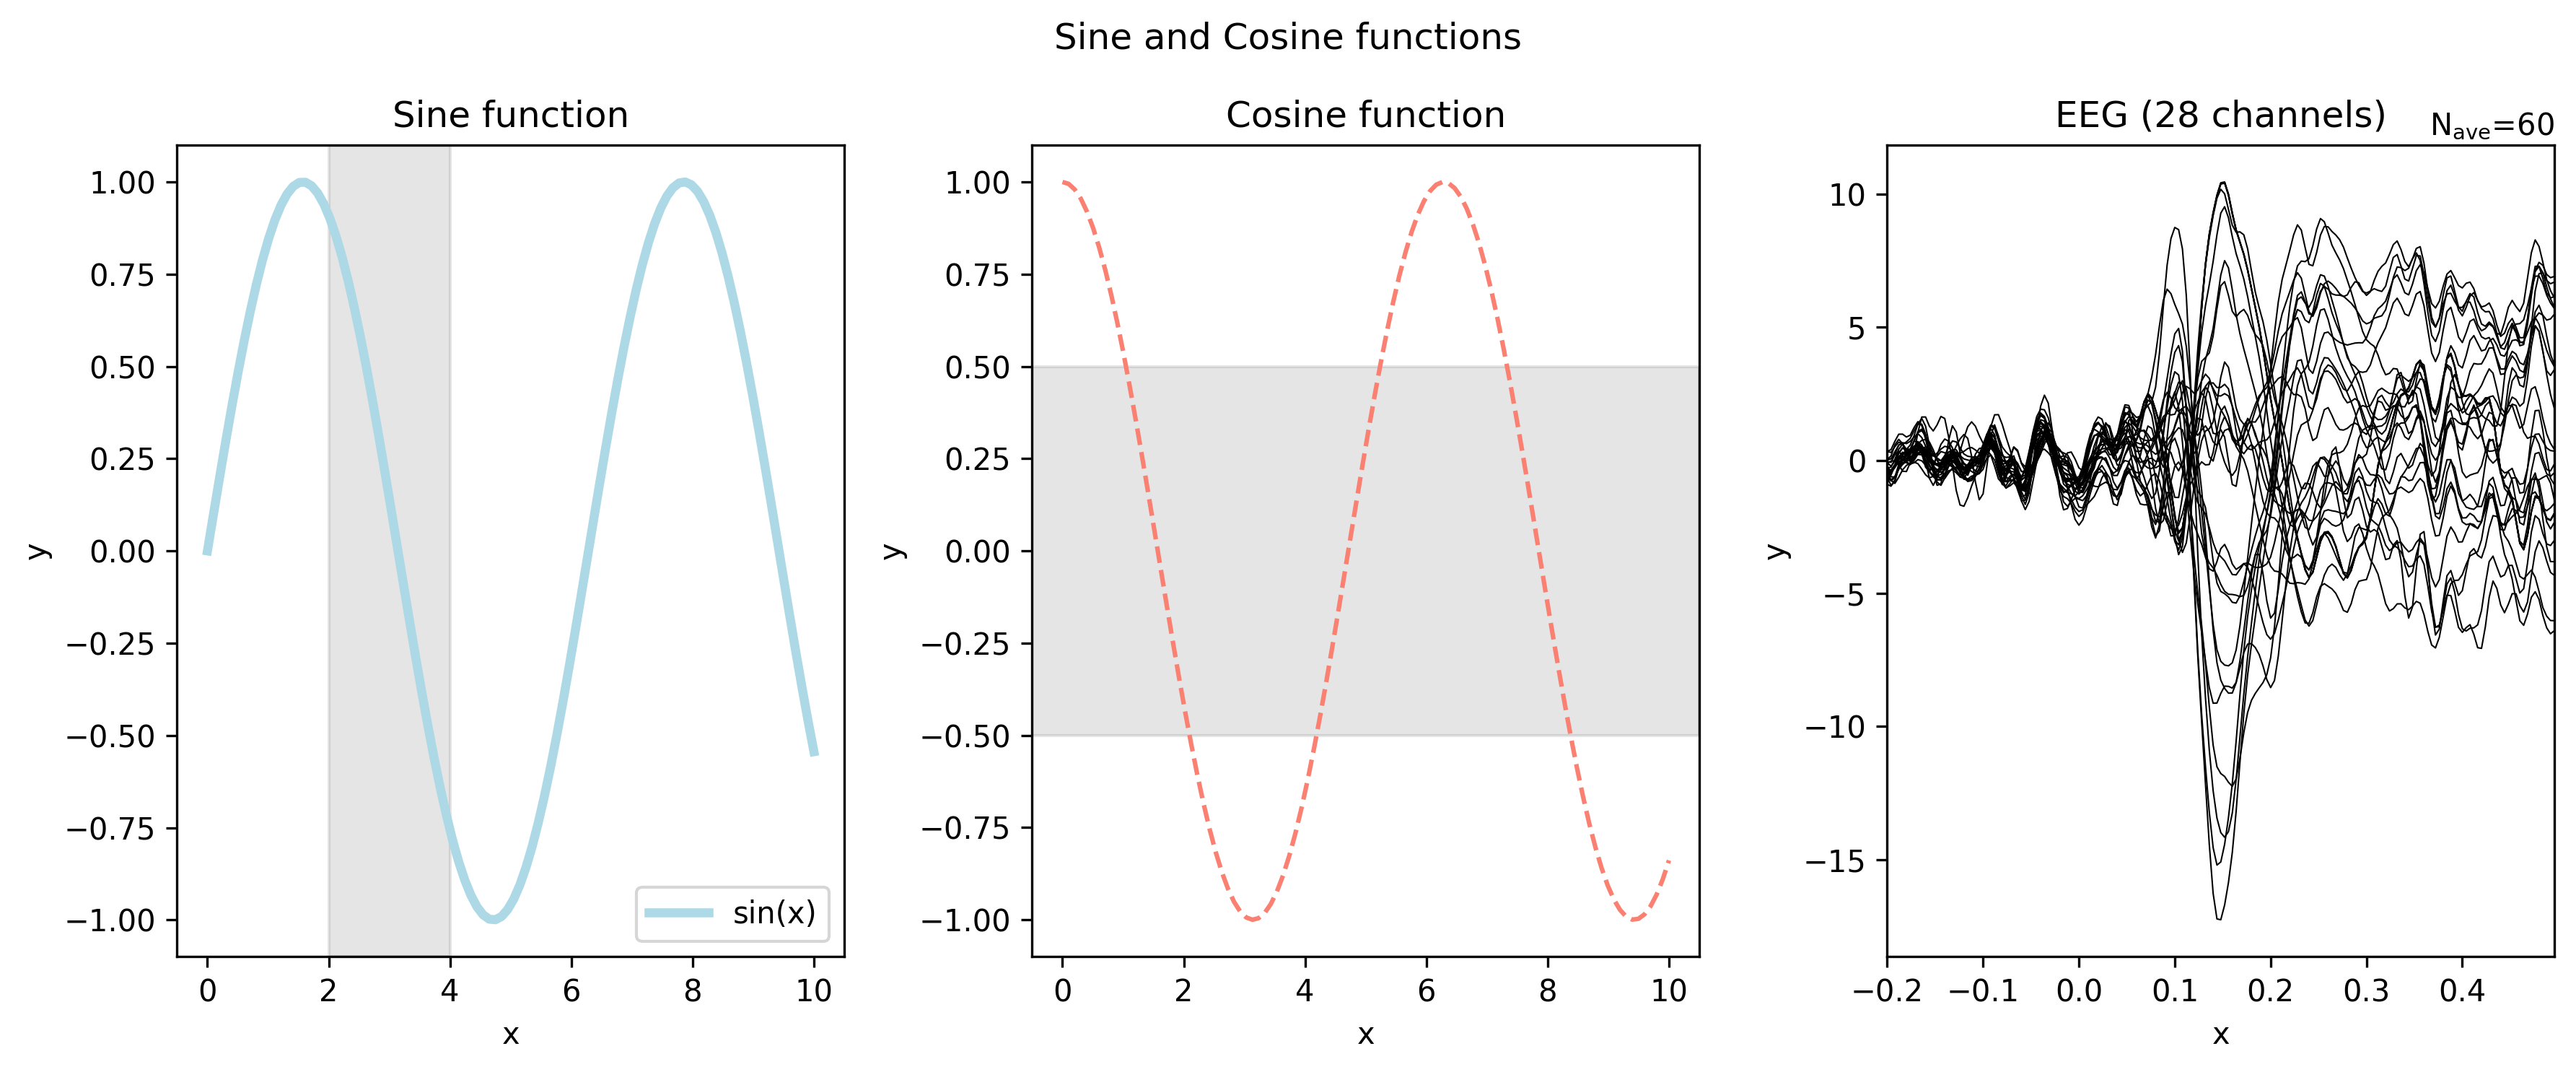

In [19]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)


# creating an empty "canvas" with two axes to draw the plots on
# 1 row, 2 columns
# fig size controls the height and width of the canvas
# dpi controls the resolution (is by default pretty low and often gives pixelated plots. I find that 300 is a good value for most purposes)
fig, axes = plt.subplots(1, 3, figsize=(12, 5), dpi=300) 

# plot on the first axies
axes[0].plot(x, y1, label='sin(x)', color='lightblue', linewidth=3)

# plot on the second axis
axes[1].plot(x, y2, label='cos(x)', color='salmon', linestyle='--')

# some mne plotting functions allows you to pass the axes as an argument
# use mne plotting functions to plot on the third axis
data_path = Path("/work/EEG_lab/example_data")
epochs = mne.read_epochs(data_path / f"Group1-epo.fif", verbose=False, preload=True)
mne.viz.plot_evoked(epochs["Image"].average(), axes=axes[2], show=False)


fig.suptitle('Sine and Cosine functions')
axes[0].set_title('Sine function')
axes[1].set_title('Cosine function')

# add a legend to the plot
axes[0].legend()

# add some labels to the axes
for ax in axes:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

# mark a specific interval on the x-axis
axes[0].axvspan(2, 4, color="grey", alpha=0.2)

# mark a specific interval on the y-axis
axes[1].axhspan(-0.5, 0.5, color="grey", alpha=0.2)

plt.tight_layout()


# Dataset
During this class we will be working with some preprocessed data from last years FaceWord experiements.

# Visualisation task 1
I have prepared some code for you to get started with the first task. You can find it in the next cells. The data is loaded and a t-test is performed. 

In [26]:
# loading in the data
data_path = Path("/work/EEG_lab/example_data")

epochs = mne.read_epochs(data_path / f"Group1-epo.fif", verbose=False, preload=True)

# only keep eeg channels
epochs.pick(["eeg"])

Number of events,240
Events,Correct/wNeg: 19Correct/wNeu/iNeg: 8Correct/wPos: 18Image/wNeg: 20Image/wNeu/iNeg: 8Image/wNeu/iPos: 12Image/wPos: 20Incorrect/wNeg: 2Incorrect/wNeu/iPos: 12Incorrect/wPos: 1Wait/wNeg: 20Wait/wNeu/iNeg: 8Wait/wNeu/iPos: 12Wait/wPos: 20Word/wNeg: 20Word/wNeu: 20Word/wPos: 20
Time range,-0.200 – 0.496 s
Baseline,-0.200 – 0.000 s


In [27]:
# CODE FOR CONDUCTING T-TEST

# extracting the data for words and images
epochs_word = epochs["Word"] 
epochs_image = epochs["Image"] 

# picks of channels and time points to use for the t-test
picks = ["O1", "Oz", "O2"]

# time window in seconds
tmin, tmax = 0.1, 0.2

# extract the data for the time window and channels
data_word = epochs_word.get_data(picks = picks, tmin = tmin, tmax = tmax)
data_image = epochs_image.get_data(picks = picks, tmin = tmin, tmax = tmax)


# the shape of the data is (number of trials, number of channels, number of time points)
print(data_word.shape) 
print(data_image.shape)

# average over time points and channels to get a single value for each trial
data_ttest_word = data_word.mean(axis = (1, 2))
data_ttest_image = data_image.mean(axis = (1, 2))

# conduct the t-test
ttest_ind(data_ttest_word, data_ttest_image)


(60, 3, 25)
(60, 3, 25)


TtestResult(statistic=-0.3118441408627894, pvalue=0.7557093047688821, df=118.0)

## Create plot(s)

Now it is your turn to create a plot. You might want to plot not only the specific time window used for the t-test but also the whole time window. Therefore, I have extracted the data for the whole time window for you below:

In [28]:
# extract the data for from the specified channels
data_word_plot = epochs_word.get_data(picks = picks)
data_image_plot = epochs_image.get_data(picks = picks)

In [29]:
# INSERT PLOTTING CODE HERE! 

# Visualisation task 2
I have prepared some code for you to get started with the second task as well. You can find it in the next cells. The data is loaded and a t-test is performed. 

In [30]:
# load in the data
all_epochs = []

data_path = Path("/work/EEG_lab/example_data")

for participant in ["Group1", "Group5", "Group6"]:
    epochs = mne.read_epochs(data_path / f"{participant}-epo.fif", verbose=False, preload=True)

    # only keep eeg channels
    epochs.pick(["eeg"])

    all_epochs.append(epochs)


print(type(all_epochs)) # we have now created a list of epochs objects
print(len(all_epochs)) # we have 3 epochs objects in the list
print(type(all_epochs[0])) # we can access the first epochs object in the list which is a Epochs object

<class 'list'>
3
<class 'mne.epochs.EpochsFIF'>


In [31]:
# create empty arrays to store the data 
word = np.array([])
image = np.array([])

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest
    data1= epochs1.get_data(picks = picks, tmin = tmin, tmax = tmax)
    data2 = epochs2.get_data(picks = picks, tmin = tmin, tmax = tmax)

    # calculate the mean over the time, channel and trial dimension (axis 0, 1 and 2)
    data1_mean = np.mean(data1, axis=(0, 1, 2))
    data2_mean = np.mean(data2, axis=(0, 1, 2))

    # append the data to the arrays
    word = np.append(word, data1_mean)
    image = np.append(image, data2_mean)

print(word)
print(image)

# now using paired t-test
ttest_rel(word, image)

[-7.08230864e-06 -4.33707991e-06 -2.76342117e-06]
[-6.65635744e-06 -4.72180027e-06 -5.17024915e-06]


TtestResult(statistic=0.9361547827207205, pvalue=0.4480190442834888, df=2)

## Create plot(s)
Now it is your turn to create a plot! I have extracted some data from the entire time window for each trial for each participant and condition to get you started:

In [32]:
# create empty arrays to store the data 
word_plot = []
image_plot = []

for epochs in all_epochs: # loop over the list with epochs for each participant

    # extract the trials you are interested in
    epochs1 = epochs["Word"]
    epochs2 = epochs["Image"]

    # extract the data for the time window and channels of interest
    data1= epochs1.get_data(picks = picks)
    data2 = epochs2.get_data(picks = picks)

    # append the data to the arrays
    word_plot.append(data1)
    image_plot.append(data2)


# we now have a list of arrays with the data for each participant
print(type(word_plot)) # we have now created a list of arrays
print(len(word_plot)) # we have 3 array objects in the list
print(type(word_plot[0])) # we can access the first array object in the list which is a numpy array
print(word_plot[0].shape) # the shape of the array is (number of trials, number of channels, number of time points)

<class 'list'>
3
<class 'numpy.ndarray'>
(60, 3, 175)


In [33]:
# INSERT CODE FOR PLOTTING HERE!

# Visualisation task 3
Code for loading data and running first and second level models are from the `06_fMRI_analysis` notebook. 

The data contains "10 subjects who were scanned with fMRI during a “language localizer” where they (covertly) read meaningful sentences (trial_type=’language’) or strings of consonants (trial_type=’string’), presented one word at a time at the center of the screen (rapid serial visual presentation)." - [Nilearn documentation](https://nilearn.github.io/dev/modules/description/language_localizer_demo.html)

In [34]:
from nilearn.datasets import fetch_language_localizer_demo_dataset
from nilearn.glm.first_level import first_level_from_bids

data_dir, _ = fetch_language_localizer_demo_dataset()


task_label = 'languagelocalizer'
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label,
        img_filters=[('desc', 'preproc')])

/tmp/ipykernel_1138/2683956678.py:4: DeprecationWarning: From version 0.13.0 this fetcherwill always return a Bunch.
Use `legacy_output=False` to start switch to this new behavior.
  data_dir, _ = fetch_language_localizer_demo_dataset()
/home/ucloud/.local/lib/python3.10/site-packages/nilearn/glm/first_level/first_level.py:1374: UserWarning: 'StartTime' not found in file /home/ucloud/nilearn_data/fMRI-language-localizer-demo-dataset/derivatives/sub-01/func/sub-01_task-languagelocalizer_desc-preproc_bold.json.
  StartTime = infer_slice_timing_start_time_from_dataset(


In [35]:
# fitting first level models
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
zmaps_first_level = []
for m_idx, (model, imgs, events, confounds) in enumerate(model_and_args):
    # fit the GLM, recall that the model variable is a FirstLevelModel object
    model.fit(imgs, events, confounds)
    # compute the contrast of interest and make a map of z-values
    zmap = model.compute_contrast('language-string')
    zmaps_first_level.append(zmap)

In [36]:
# preparing second level model
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

# we will simply add the zmaps from the first level as input to the second level model
second_level_input = zmaps_first_level

# create intercept design matrix
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=['intercept'],
)


# adding the smoothing parameter and fitting the model 
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input, design_matrix=design_matrix)

# computing the second level contrast
zmap_second_level = second_level_model.compute_contrast()

## Create plot(s)

In [37]:
# setting a significance threshold
from scipy.stats import norm
p001_unc = norm.isf(0.001)

In [38]:
# you can rely on the nilearn plotting functions to plot the results or another plotting library if you prefer
# have a look in notebooks from lab for inspiration!
import nilearn.plotting as plotting

In [39]:
# INSERT CODE FOR PLOTTING HERE!